In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn jupyterlab

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cell 1 – Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # ok here; in ChatGPT plots we avoid seaborn, but locally it's fine
%matplotlib inline

In [3]:
# Cell 2 – Load engineered Excel
df = pd.read_excel("Harvard_Mental_Health_Prediction_Project.xlsx",
                   sheet_name="Feature Engineering")

In [4]:
# Cell 3 – Basic overview
display(df.head())
df.describe(include="all").T

,Sleep Category,Stress Bin,Risk Score,Is_AtRisk,Study Intensity,Student ID,Student Name,Age,Gender,Academic Year,GPA,Study Hours Per Week,Sleep Hours,Stress Level,Social Support Score,Therapy History,Family History,Depression Score,Anxiety Score
0,>7,Med,1,No,Moderate,S001,Ava Patel,24,Female,Senior,3.79,16,8.4,4,1,Yes,No,2,16
1,>7,High,2,Yes,Heavy,S002,Benjamin Kim,21,Female,Freshman,3.20,35,7.7,10,1,No,Yes,15,0
2,>7,High,2,Yes,Moderate,S003,Charlotte Nguyen,22,Male,Senior,3.84,18,7.1,7,10,No,No,24,15
3,<5,High,3,Yes,Heavy,S004,Daniel Gomez,24,Male,Junior,2.18,37,4.7,9,4,Yes,No,2,11
4,<5,High,3,Yes,Moderate,S005,Ella Rossi,20,Female,Junior,2.39,16,4.8,7,7,No,Yes,24,18


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sleep Category,25,3,5-7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stress Bin,25,3,High,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk Score,25.0,NaN,NaN,NaN,1.88,0.971253,0.0,1.0,2.0,2.0,4.0
Is_AtRisk,25,2,Yes,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Study Intensity,25,3,Moderate,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Student ID,25,25,S001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Student Name,25,25,Ava Patel,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,25.0,NaN,NaN,NaN,21.52,1.636052,19.0,20.0,22.0,23.0,24.0
Gender,25,3,Male,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic Year,25,4,Sophomore,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


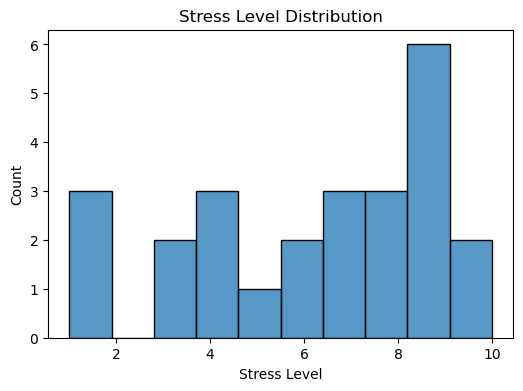

In [6]:
# Distribution of StressLevel
plt.figure(figsize=(6,4))
sns.histplot(df["Stress Level"], bins=10)
plt.title("Stress Level Distribution")
plt.show()

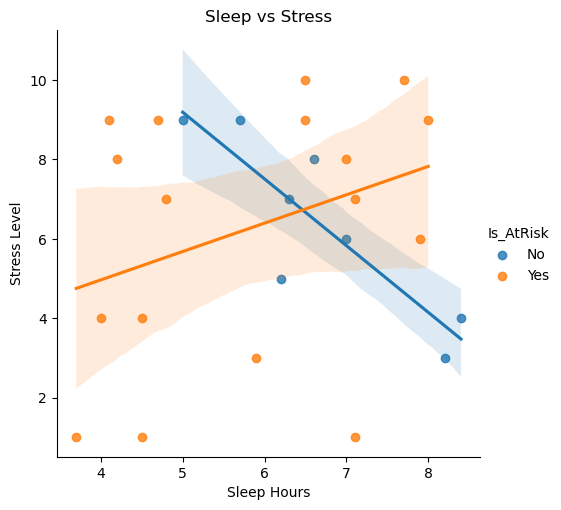

In [7]:
# Sleep vs Stress scatter
sns.lmplot(data=df, x="Sleep Hours", y="Stress Level",
           hue="Is_AtRisk", height=5)
plt.title("Sleep vs Stress")
plt.show()

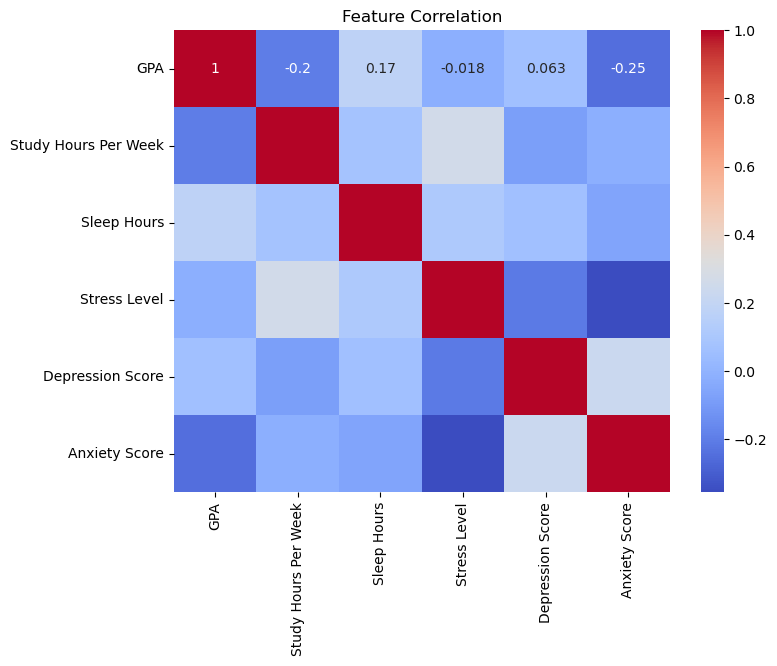

In [8]:
# Correlation heat‑map
plt.figure(figsize=(8,6))
sns.heatmap(df[["GPA","Study Hours Per Week","Sleep Hours",
                "Stress Level","Depression Score","Anxiety Score"]]
            .corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()